In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#-----------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [4]:
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\ndear ...,1


In [5]:
print(data.loc[[4000],['text']].values) 

[['Subject: 18 noms to city gates\n- - - - - - - - - - - - - - - - - - - - - - forwarded by ami chokshi / corp / enron on 01 / 18 / 2000\n07 : 52 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\ntroy _ a _ benoit @ reliantenergy . com on 01 / 17 / 2000 11 : 12 : 54 am\nto : ami chokshi / corp / enron @ enron\ncc :\nsubject : 18 noms to city gates\n( see attached file : hpl - jan . xls )\n- hpl - jan . xls']]


In [6]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
#Xóa cột không cần thiết
data.drop(['Unnamed: 0','label'],axis=1, inplace=True)


In [9]:
data.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [10]:
#Tiền xử lý văn bản
import nltk
import re

In [11]:
#Thực hiện chuyển đổi các phần viết tắt thành câu đầy đủ
def decontracted(st):
    st = re.sub(r"won\'t", "will not", st)
    st = re.sub(r"can\'t", "can not", st)

    st = re.sub(r"n\'t", " not", st)
    st = re.sub(r"\'re", " are", st)
    st = re.sub(r"\'s", " is", st)
    st = re.sub(r"\'d", " would", st)
    st = re.sub(r"\'ll", " will", st)
    st = re.sub(r"\'ve", " have", st)
    st = re.sub(r"\'m", " am", st)
    return st

In [12]:
#thực hiện loai bỏ các dấu câu, ký tự đặc biệt trong chuỗi
def clear_punctuation(st):
    word = re.sub(r'[^\w\s]', '',st)
    return word

In [13]:
#kết hợp sử dụng các hàm ở trên để xử lý chuỗi
def clear_noise(word):
    word = word.lower()         
    word = decontracted(word)
    word = clear_punctuation(word)
    return word

In [14]:
#Loại bỏ các từ 
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
#Hiển thị danh sách các stopwords trong tiếng anh
print('Hiển thị danh sách các stopwords trong tiếng anh:\n',stop)

Hiển thị danh sách các stopwords trong tiếng anh:
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', '

In [16]:
def clear_stopwords(st):
    word = " ".join(st for st in st.split() if st not in stop)
    return word

In [17]:
#Chuẩn hóa từ (Stemming và Lemmatization)
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()

import string

def fun_stemlem(word):
    list_word_clean = []
    for w1 in word.split(" "):
        word_lemma =  wn.lemmatize(w1,  pos="v")
        list_word_clean.append(word_lemma)

  #Cleaning, lowering and remove whitespaces
    word = " ".join(list_word_clean)
    return word 

In [18]:
#Ví dụ một comment trong data:
st1 = data.iloc[2000]['text']
st1

"Subject: mobil chemical - hpl meter # 1256 - expense transport\ned - can you help ? i need to know the term of our existing transport expense\ndeal with reliant entex to serve the referenced customer . we must have an\nexisting contract that we can look up . our existing deal to sell to mobil\nexpires october 1 . i am trying to make a two year sales offer beginning\noctober 1 . if the transport expires before then , then we ' ll need to call\nentex about a transport rate . who is the correct dealmaker to call entex on\nthis matter ? ? i ' d be happy to do it , but i ' d be stepping on somebody else ' s\nturf .\nif the existing rate is indeed 5 cents plus 2 . 02 % fuel , that seems kind of\nhigh . it ' s a short haul - according to our field folk , we give the gas to\nentex at the la porte city gate , and it goes to the mobil plant at pasadena ,\nabout 10 miles away at the most .\nany and all help appreciated .\nlee\nenron north america corp .\nfrom : pat clynes @ enron 09 / 06 / 2000 

In [19]:
print('1.----------Chuỗi ban đầu------------------------:\n ', st1)
sta = clear_noise(st1)
print('\n 2.----------Chuỗi loại bỏ nhiễu:-----------------:\n',sta)
stb = clear_stopwords(sta)
print('\n 3.----------Chuỗi loại bỏ stopwords--------------:\n',stb)
stc = fun_stemlem(stb)
print('\n 4.--Chuỗi loại xử lý Stemming và Lemmatization---:\n',stc) 

1.----------Chuỗi ban đầu------------------------:
  Subject: mobil chemical - hpl meter # 1256 - expense transport
ed - can you help ? i need to know the term of our existing transport expense
deal with reliant entex to serve the referenced customer . we must have an
existing contract that we can look up . our existing deal to sell to mobil
expires october 1 . i am trying to make a two year sales offer beginning
october 1 . if the transport expires before then , then we ' ll need to call
entex about a transport rate . who is the correct dealmaker to call entex on
this matter ? ? i ' d be happy to do it , but i ' d be stepping on somebody else ' s
turf .
if the existing rate is indeed 5 cents plus 2 . 02 % fuel , that seems kind of
high . it ' s a short haul - according to our field folk , we give the gas to
entex at the la porte city gate , and it goes to the mobil plant at pasadena ,
about 10 miles away at the most .
any and all help appreciated .
lee
enron north america corp .
from 

### Tiền Xử lý toàn bộ tập dữ liệu với các hàm đã xây dựng



In [20]:
#Xây dựng hàm prepare_data: để thực hiện tiền xử lý dữ liệu
def prepare_data(word):
    word = clear_noise(word)       
    word = clear_stopwords(word)    
    word = fun_stemlem(word)        
    return word

In [21]:
data_new = data.copy()
data_new['text_ok'] = data['text'].apply(lambda x: prepare_data(x))

In [22]:
data_new.head()

,text,label_num,text_ok
0,Subject: enron methanol ; meter # : 988291\nth...,0,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,subject hpl nom january 9 2001 see attach file...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,Subject: re : indian springs\nthis deal is to ...,0,subject indian spring deal book teco pvr reven...


In [23]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
 2   text_ok    5171 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


### Kiểm tra mức độ cân bằng của tập dữ liệu

In [24]:
x = data_new['label_num'].value_counts()
print(x)

label_num
0    3672
1    1499
Name: count, dtype: int64


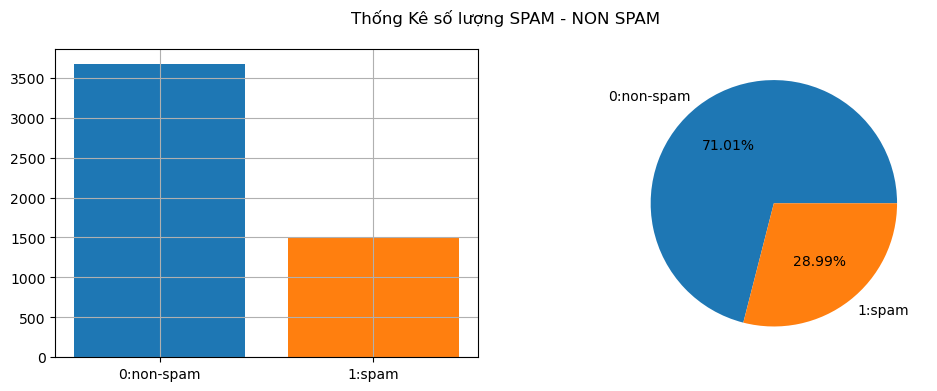

In [25]:
label = ["0:non-spam", "1:spam"]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.suptitle("Thống Kê số lượng SPAM - NON SPAM")
plt.bar(label,x, color=['#1E77B4','#FF7F0F'])
plt.grid()

plt.subplot(1,2,2)
plt.pie(x, labels=label, autopct='%.2f%%', colors=['#1E77B4','#FF7F0F'])

plt.show()
#Tập dữ liệu mất cân bằng nhẹ

In [26]:
#Lưu trữ dữ liệu đã xử lý
data_new.to_csv('Data_all.csv', index=None, header=True)

#Chỉ lưu trữ 2 thuộc tính text_ok, label_num
data_new[['text_ok','label_num']].to_csv('Data_finish.csv', index=None, header=True)


### Phân tách Biến độc - Biến phụ thuộc

In [27]:
import pandas as pd
data_finish = pd.read_csv('Data_finish.csv')
data_finish.head(10)

,text_ok,label_num
0,subject enron methanol meter 988291 follow not...,0
1,subject hpl nom january 9 2001 see attach file...,0
2,subject neon retreat ho ho ho around wonderful...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian spring deal book teco pvr reven...,0
5,subject ehronline web address change message i...,0
6,subject spring save certificate take 30 save 3...,0
7,subject look medication best source difficult ...,1
8,subject noms actual flow 2 26 agree forward me...,0
9,subject nominations oct 21 23 2000 see attach ...,0


In [28]:
#Biến độc lập X
X = data_finish.loc[:,'text_ok']
X

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom january 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonderful...
3       subject photoshop windows office cheap main tr...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put 10 ft transport volumes decrease 2...
5167    subject 3 4 2000 follow noms hpl take extra 15...
5168    subject calpine daily gas nomination julie men...
5169    subject industrial worksheets august 2000 acti...
5170    subject important online bank alert dear value...
Name: text_ok, Length: 5171, dtype: object

In [29]:
#Biến phụ thuộc y
y = data_finish.loc[:,'label_num']
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [30]:
#Tách dữ liệu thành tập Train - Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print('1.Tập ban đầu:',data_finish.shape)
print('-------------------------------')
print('a.Tập Train: ', X_train.shape)
print('b.Tập Test: ', y_test.shape)

1.Tập ban đầu: (5171, 2)
-------------------------------
a.Tập Train:  (4136,)
b.Tập Test:  (1035,)


### Embedding TẬP DỮ LIỆU ĐÃ XỬ LÝ

In [31]:
# Tính TF-IDF cho tập dữ liệu
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text

vector = TfidfVectorizer()
vector.fit(data_finish['text_ok'])

#Chuyển đổi tập Train - Test ra số:
X_train_tfidf = vector.transform(X_train)
X_test_tfidf = vector.transform(X_test)

In [32]:
#Dữ liệu sau khi chuyển sang số với TF-IDF:
print('1.Train:',X_train_tfidf.shape)
print('2.Test:',X_test_tfidf.shape)

1.Train: (4136, 46692)
2.Test: (1035, 46692)


In [33]:
print(X_train.iloc[20])
print(X_train_tfidf[20].data)
print(X_train_tfidf[20].data.shape)

subject ena organizational change ena first quarter performance outstanding achieve exceptional talent hard work ena employees ena ability quickly move people new business venture market opportunities enron net work reinforce depth talent ena continue commitment encourage innovation creativity things enthusiasm support people pursue new ideas accordingly follow recently announce launch enron net work associate personnel movements please announce follow change within ena effective immediately john lavorato relocate calgary houston oversee ena risk management trade activities report office chairman john direct responsibility natural gas power emissions equities rat trade well john direct responsibility risk management trade function within pulp paper coal global risk weather insurance businesses otherwise pulp paper coal global risk businesses report office chairman follow john departure canada ask rob milnthorp president enron canada follow departure greg piper industrial origination te

### MACHINE LEARNING CHO PHÂN LỚP MAIL SPAM

In [34]:
#Sử dụng mô hình Naive Bayes với TF-IDF
from sklearn import naive_bayes

#Khai báo sử dụng model Multinomial Naive bayes:
MultiNB = naive_bayes.MultinomialNB(alpha=0.75)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB.fit(X_train_tfidf,y_train)

#Danh sách các tham số của model:
MultiNB.get_params()

{'alpha': 0.75, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [35]:
#Đánh giá độ chính xác của mô hình trên tập huấn luyện
acc_MultiNB = round(MultiNB.score(X_train_tfidf, y_train) * 100, 2)

print('Độ chính xác của mô hình trên tập huấn luyện: ', acc_MultiNB, '%')

Độ chính xác của mô hình trên tập huấn luyện:  97.0 %


In [36]:
from sklearn.metrics import accuracy_score
#Dự đoán và tính đoán độ chính xác của model trên tập Test:
y_pred = MultiNB.predict(X_test_tfidf)

acc1 = round(accuracy_score(y_test, y_pred)*100, 2)
print('1.Độ chính xác của mô hình trên tập Test: ', acc1, '%')

acc2 = accuracy_score(y_test, y_pred, normalize=False)
print('2.Tổng số mẫu dự đoán đúng:', acc2, ' /', len(y_test))
print('3.Tổng số mẫu dự đoán sai:', len(y_test) - acc2, ' /', len(y_test))

1.Độ chính xác của mô hình trên tập Test:  93.53 %
2.Tổng số mẫu dự đoán đúng: 968  / 1035
3.Tổng số mẫu dự đoán sai: 67  / 1035


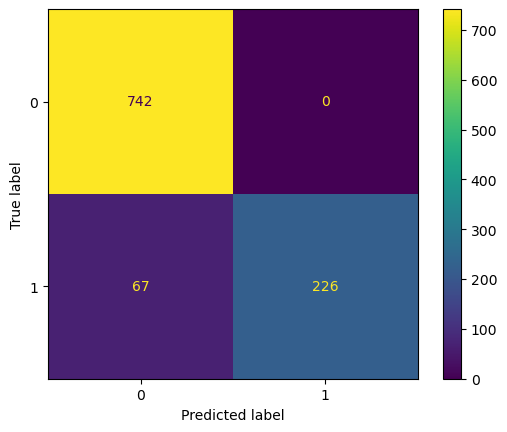

In [37]:
#Hiển thị confusion matrix:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Hiển thị dạng số:
cm = confusion_matrix(y_test, y_pred, labels=MultiNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MultiNB.classes_)
disp.plot()
plt.show()

### Áp dụng model

In [38]:

cm_new_1 = "Subject: Congratulations! You've Won $1,000,000!Body:Dear User,You have been selected as the lucky winner of our $1,000,000 cash prize! 🎉To claim your prize, simply reply to this email with your full name, address, phone number, and banking details.Act now – this offer is only valid for the next 24 hours!Thank you,[XYZ International Lottery]"
print('Email: ', cm_new_1)

Email:  Subject: Congratulations! You've Won $1,000,000!Body:Dear User,You have been selected as the lucky winner of our $1,000,000 cash prize! 🎉To claim your prize, simply reply to this email with your full name, address, phone number, and banking details.Act now – this offer is only valid for the next 24 hours!Thank you,[XYZ International Lottery]


In [39]:
#Tiền xử lý và chuẩn hóa comment:
cm_new_processed = prepare_data(cm_new_1)

print('Chuỗi thô:', cm_new_1)
print('Chuỗi sau xử lý: ', cm_new_processed)

Chuỗi thô: Subject: Congratulations! You've Won $1,000,000!Body:Dear User,You have been selected as the lucky winner of our $1,000,000 cash prize! 🎉To claim your prize, simply reply to this email with your full name, address, phone number, and banking details.Act now – this offer is only valid for the next 24 hours!Thank you,[XYZ International Lottery]
Chuỗi sau xử lý:  subject congratulations 1000000bodydear useryou select lucky winner 1000000 cash prize claim prize simply reply email full name address phone number bank detailsact offer valid next 24 hoursthank youxyz international lottery


In [40]:
#Chuyển về số với TFIDF:
cm_new_tfidf = vector.transform([cm_new_processed])

print('text:' ,cm_new_processed)
print('number:', cm_new_tfidf)
print('shape:', cm_new_tfidf.shape)

text: subject congratulations 1000000bodydear useryou select lucky winner 1000000 cash prize claim prize simply reply email full name address phone number bank detailsact offer valid next 24 hoursthank youxyz international lottery
number:   (0, 45125)	0.2692557552512231
  (0, 43582)	0.1911378542365833
  (0, 40274)	0.038955065731583034
  (0, 38773)	0.20387237373766606
  (0, 38058)	0.1882509733101007
  (0, 36240)	0.16870110268762295
  (0, 34393)	0.4649283823957422
  (0, 33233)	0.15712766674310563
  (0, 31438)	0.14397569540325972
  (0, 31128)	0.13028283380217107
  (0, 30601)	0.1483413403179922
  (0, 30213)	0.1510557262066166
  (0, 27623)	0.2516486450461146
  (0, 27457)	0.26405403107430503
  (0, 24207)	0.19591383575253482
  (0, 19848)	0.1842860217629193
  (0, 17176)	0.12762664000828094
  (0, 12887)	0.26169239494649343
  (0, 11932)	0.22125751715571393
  (0, 10837)	0.1918942870475282
  (0, 7885)	0.20087435132143713
  (0, 5171)	0.1568160245551542
  (0, 1354)	0.14045615638562395
shape: (1, 466

In [41]:
#Dự đoán với model Naive Bayes:
cm_new_pred = MultiNB.predict(cm_new_tfidf)
print(cm_new_pred)
if (cm_new_pred==0):
    print('ML said: This email is non spam!')
else:
    print('ML said: Warning - This eamil is SPAM')

[1]
ML said: Warning - This eamil is SPAM


In [43]:
m_new2 ="""Subject: Meeting Reminder: Project Update Discussion

Body:
Hi Team,

This is a reminder about our scheduled meeting tomorrow to discuss the updates on the project timeline and deliverables.

Details:

Date: November 25, 2024
Time: 10:00 AM
Location: Conference Room A (or via Zoom: Zoom Link)
Please make sure to review the project documentation before the meeting and come prepared with any updates or questions. Let me know if you're unable to attend.

Best regards,
[John Smith]
Project Manager
[Company Name]"""
print(m_new2)

Subject: Meeting Reminder: Project Update Discussion

Body:
Hi Team,

This is a reminder about our scheduled meeting tomorrow to discuss the updates on the project timeline and deliverables.

Details:

Date: November 25, 2024
Time: 10:00 AM
Location: Conference Room A (or via Zoom: Zoom Link)
Please make sure to review the project documentation before the meeting and come prepared with any updates or questions. Let me know if you're unable to attend.

Best regards,
[John Smith]
Project Manager
[Company Name]


In [44]:
cm_new_processed1 = prepare_data(m_new2)

print('Chuỗi thô:', m_new2)
print('Chuỗi sau xử lý: ', cm_new_processed1)

Chuỗi thô: Subject: Meeting Reminder: Project Update Discussion

Body:
Hi Team,

This is a reminder about our scheduled meeting tomorrow to discuss the updates on the project timeline and deliverables.

Details:

Date: November 25, 2024
Time: 10:00 AM
Location: Conference Room A (or via Zoom: Zoom Link)
Please make sure to review the project documentation before the meeting and come prepared with any updates or questions. Let me know if you're unable to attend.

Best regards,
[John Smith]
Project Manager
[Company Name]
Chuỗi sau xử lý:  subject meet reminder project update discussion body hi team reminder schedule meet tomorrow discuss update project timeline deliverables detail date november 25 2024 time 1000 location conference room via zoom zoom link please make sure review project documentation meet come prepare update question let know unable attend best regard john smith project manager company name


In [45]:
cm_new_tfidf1 = vector.transform([cm_new_processed1])

print('text:' ,cm_new_processed1)
print('number:', cm_new_tfidf1)
print('shape:', cm_new_tfidf1.shape)

text: subject meet reminder project update discussion body hi team reminder schedule meet tomorrow discuss update project timeline deliverables detail date november 25 2024 time 1000 location conference room via zoom zoom link please make sure review project documentation meet come prepare update question let know unable attend best regard john smith project manager company name
number:   (0, 46572)	0.4053391039364033
  (0, 43914)	0.09908622996600143
  (0, 43272)	0.2713080329946266
  (0, 42974)	0.13143177961078745
  (0, 41992)	0.1066368406463301
  (0, 41763)	0.1709508956231742
  (0, 41757)	0.06764755205260559
  (0, 41105)	0.09908622996600143
  (0, 40520)	0.09174380545850776
  (0, 40274)	0.022880174106316188
  (0, 39095)	0.09460755996098914
  (0, 37703)	0.08536436938105446
  (0, 36986)	0.12198580920334341
  (0, 36495)	0.0954358920176
  (0, 36134)	0.2730746858311165
  (0, 35980)	0.0852289833404339
  (0, 35289)	0.06764755205260559
  (0, 34523)	0.4119491819320772
  (0, 34221)	0.12005112144

In [46]:
#Dự đoán với model Naive Bayes:
cm_new_pred1 = MultiNB.predict(cm_new_tfidf1)
print(cm_new_pred1)
if (cm_new_pred1==0):
    print('ML said: This email is non spam!')
else:
    print('ML said: Warning - This eamil is SPAM')

[0]
ML said: This email is non spam!


In [48]:
import pickle

# Lưu mô hình Naive Bayes đã huấn luyện
pickle.dump(MultiNB, open("Naive_model.pkl", 'wb'))
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vector, file)
